In [1]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q

from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()



HTML(custom_css)

In [2]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import math
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from colorama import Fore, Style
from prettytable import PrettyTable ,ALL
from tabulate import tabulate

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv',index_col='id')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv',index_col='id')
df_orginal = pd.read_csv('/kaggle/input/machine-failure-predictions/machine failure.csv')
df_submission = pd.read_csv('/kaggle/input/playground-series-s3e17/sample_submission.csv',index_col='id')

In [5]:
%%time



def Print(text: str, color=Fore.MAGENTA, style=Style.BRIGHT):
    print(style + color + text + Style.RESET_ALL)
df_orginal.drop(['UDI'] , axis = 1 , inplace = True)

def Preprocess(df, name):
    # Define color styles for the table
    if name == 'Train':
        styles = [
            {'selector': 'th', 'props': [('border', '1px solid black'),('background-color', 'lightgreen'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid black'),('background-color', 'lightpink'), ('text-align', 'center')]},



        ]

    else  :
        styles = [
            {'selector': 'th, td', 'props': [('border', '1px solid black'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', 'lightblue')]},
        ]



    ####################
    #   First 5 Rows   #
    ####################
    Print(f'\n---------- Data Preprocessing ----------\n', Fore.RED)



    Print(f'\n----------->{name}.head()\n')
    display(df.head())

    ###################
    #   Describing    #
    ###################



    Print(f'\n----------->{name} Description\n')
    if name == 'Original':
        table = df.describe().T.style.bar(subset=['mean'], color='gray') \
                               .background_gradient(subset=['std'], cmap='Blues') \
                               .background_gradient(subset=['min'], cmap='Reds') \
                               .background_gradient(subset=['max'], cmap='Purples') \
                               .set_table_styles(styles)

        display(table)
    else:
        table = df.describe().T.style.bar(subset=['mean'], color='cyan') \
                               .set_table_styles(styles)
        display(table)

    ##################
    #   Information  #
    ##################

    Print(f'\n---------->{name} Information\n')
    info = df.info()

   ######################
   #   Null values      #
   ######################



    Print(f'\n----------> Sum of null values in {name}\n')
    if name == 'Original':
        null_counts = df.isnull().sum()



        table = PrettyTable()
        table.field_names = ['Column', 'Null Count']
        for col, null_count in null_counts.items():
            table.add_row([col, null_count])



        table.hrules = ALL  # Add lines between each line
        print(table)

    else :
        null_counts = df.isnull().sum()



        table = []
        for col, null_count in null_counts.items():
            table.append([col, null_count])



        headers = ['Column', 'Null Count']
        print(tabulate(table, headers, tablefmt='grid'))

    ##################
    #   Zero Values  #
    ##################

    Print(f'\n-----------> Sum of zero values in {name}\n')
    if name == 'Original':

        zeros = df.isin({0}).sum()



        table = PrettyTable()
        table.field_names = ['Column', 'Zero Count']
        for col, zero_count in zeros.items():
            table.add_row([col, zero_count])



        table.hrules = ALL  # Add lines between each line
        print(table)

    else :

        df_zero_count = df.isin({0}).sum()
        df_zero_count_vertical = df_zero_count.to_frame()



        # Define border styles for the DataFrame
        border_styles = [
            {'selector': 'th, td', 'props': [('border', '1px solid black'), ('text-align', 'center')]},
        ]



        # Apply border styles to the DataFrame
        styled_df = df_zero_count_vertical.style.set_table_styles(border_styles)



        # Display the styled DataFrame
        display(styled_df)

     #################
    #  Correlation   #
    ##################
    if name == 'Original':

        df_corr = df.corr(numeric_only=True)  # Explicitly set numeric_only=True
        # Create a heatmap using seaborn
        plt.figure(figsize=(12, 8))  # Set the size of the figure
        sns.heatmap(df_corr, cmap='coolwarm', annot=True)
        # Display the heatmap
        Print(f'\n-----------> Correlation of {name}\n')
        plt.show()

    else :
        df_corr = df.corr(numeric_only=True)  # Explicitly set numeric_only=True
        # Create a heatmap using seaborn
        plt.figure(figsize=(12, 8))  # Set the size of the figure
        sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
        # Display the heatmap
        Print(f'\n-----------> Correlation of {name}\n')
        plt.show()
Print(f"\n{'-'*15}> Running Done...^-^ \n")


---------------> Running Done...^-^ 

CPU times: user 1.21 ms, sys: 1.02 ms, total: 2.23 ms
Wall time: 3.26 ms



---------- Data Preprocessing ----------


----------->Train.head()



,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0



----------->Train Description



,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.000000,299.862776,1.862247,295.300000,298.300000,300.000000,301.200000,304.400000
Process temperature [K],136429.000000,309.941070,1.385173,305.800000,308.700000,310.000000,310.900000,313.800000
Rotational speed [rpm],136429.000000,1520.331110,138.736632,1181.000000,1432.000000,1493.000000,1580.000000,2886.000000
Torque [Nm],136429.000000,40.348643,8.502229,3.800000,34.600000,40.400000,46.100000,76.600000
Tool wear [min],136429.000000,104.408901,63.965040,0.000000,48.000000,106.000000,159.000000,253.000000
Machine failure,136429.000000,0.015744,0.124486,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,136429.000000,0.001554,0.039389,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,136429.000000,0.005160,0.071649,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,136429.000000,0.002397,0.048899,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,136429.000000,0.003958,0.062789,0.000000,0.000000,0.000000,0.000000,1.000000



---------->Train Information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), obj

,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],3790
Machine failure,134281
TWF,136217
HDF,135725



-----------> Correlation of Train



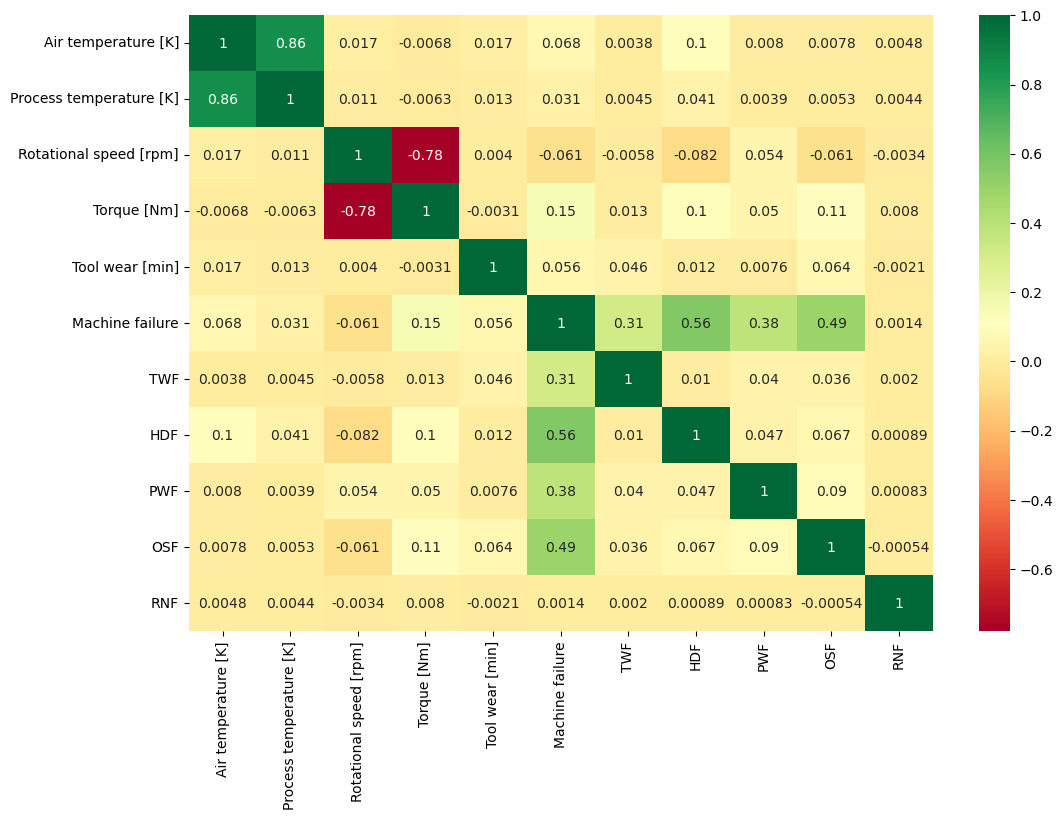

In [6]:
# Function calling for train data
Preprocess(df_train,'Train')


---------- Data Preprocessing ----------


----------->Original.head()



,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



----------->Original Description



,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.000000,300.004930,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.000000,310.005560,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Rotational speed [rpm],10000.000000,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000
Torque [Nm],10000.000000,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000
Tool wear [min],10000.000000,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Machine failure,10000.000000,0.033900,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,10000.000000,0.004600,0.067671,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,10000.000000,0.011500,0.106625,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,10000.000000,0.009500,0.097009,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,10000.000000,0.009800,0.098514,0.000000,0.000000,0.000000,0.000000,1.000000



---------->Original Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory u

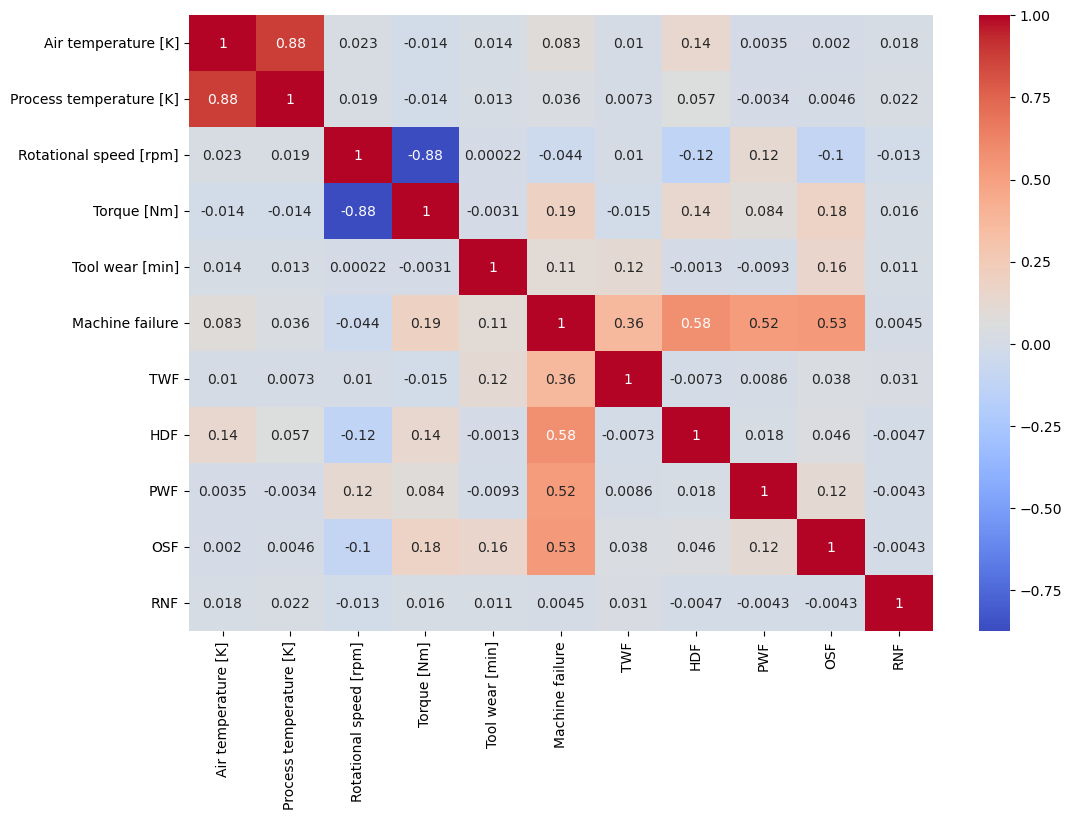

In [7]:
# Function calling for orginal data
Preprocess(df_orginal,'Original')

In [8]:
print('Shape of Train dataset is :',df_train.shape)
print('Size of Train dataset is  :',df_train.size)

Shape of Train dataset is : (136429, 13)
Size of Train dataset is  : 1773577


In [9]:
print(f'This train dataset has {df_train.shape[0]} instances with the {df_train.shape[1]-1} features and 1 output variable')

This train dataset has 136429 instances with the 12 features and 1 output variable


In [10]:
df_train.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [11]:
# Drop duplicate records
df_train = df_train.drop_duplicates()

# Identify duplicate records
duplicates = df_train.duplicated()

# Count the number of duplicate records
count_duplicates = duplicates.sum()

# Print the count of duplicate records
print("Number of duplicate records:", count_duplicates)

Number of duplicate records: 0


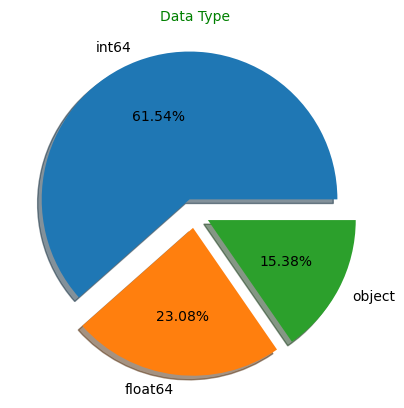

In [12]:
# Visualize the datatypes
plt.rcParams.update({'font.size': 10})

df_train.dtypes.value_counts().plot.pie(explode=[0.1, 0.1,0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Times New Roman');

In [13]:
!pip install missingno

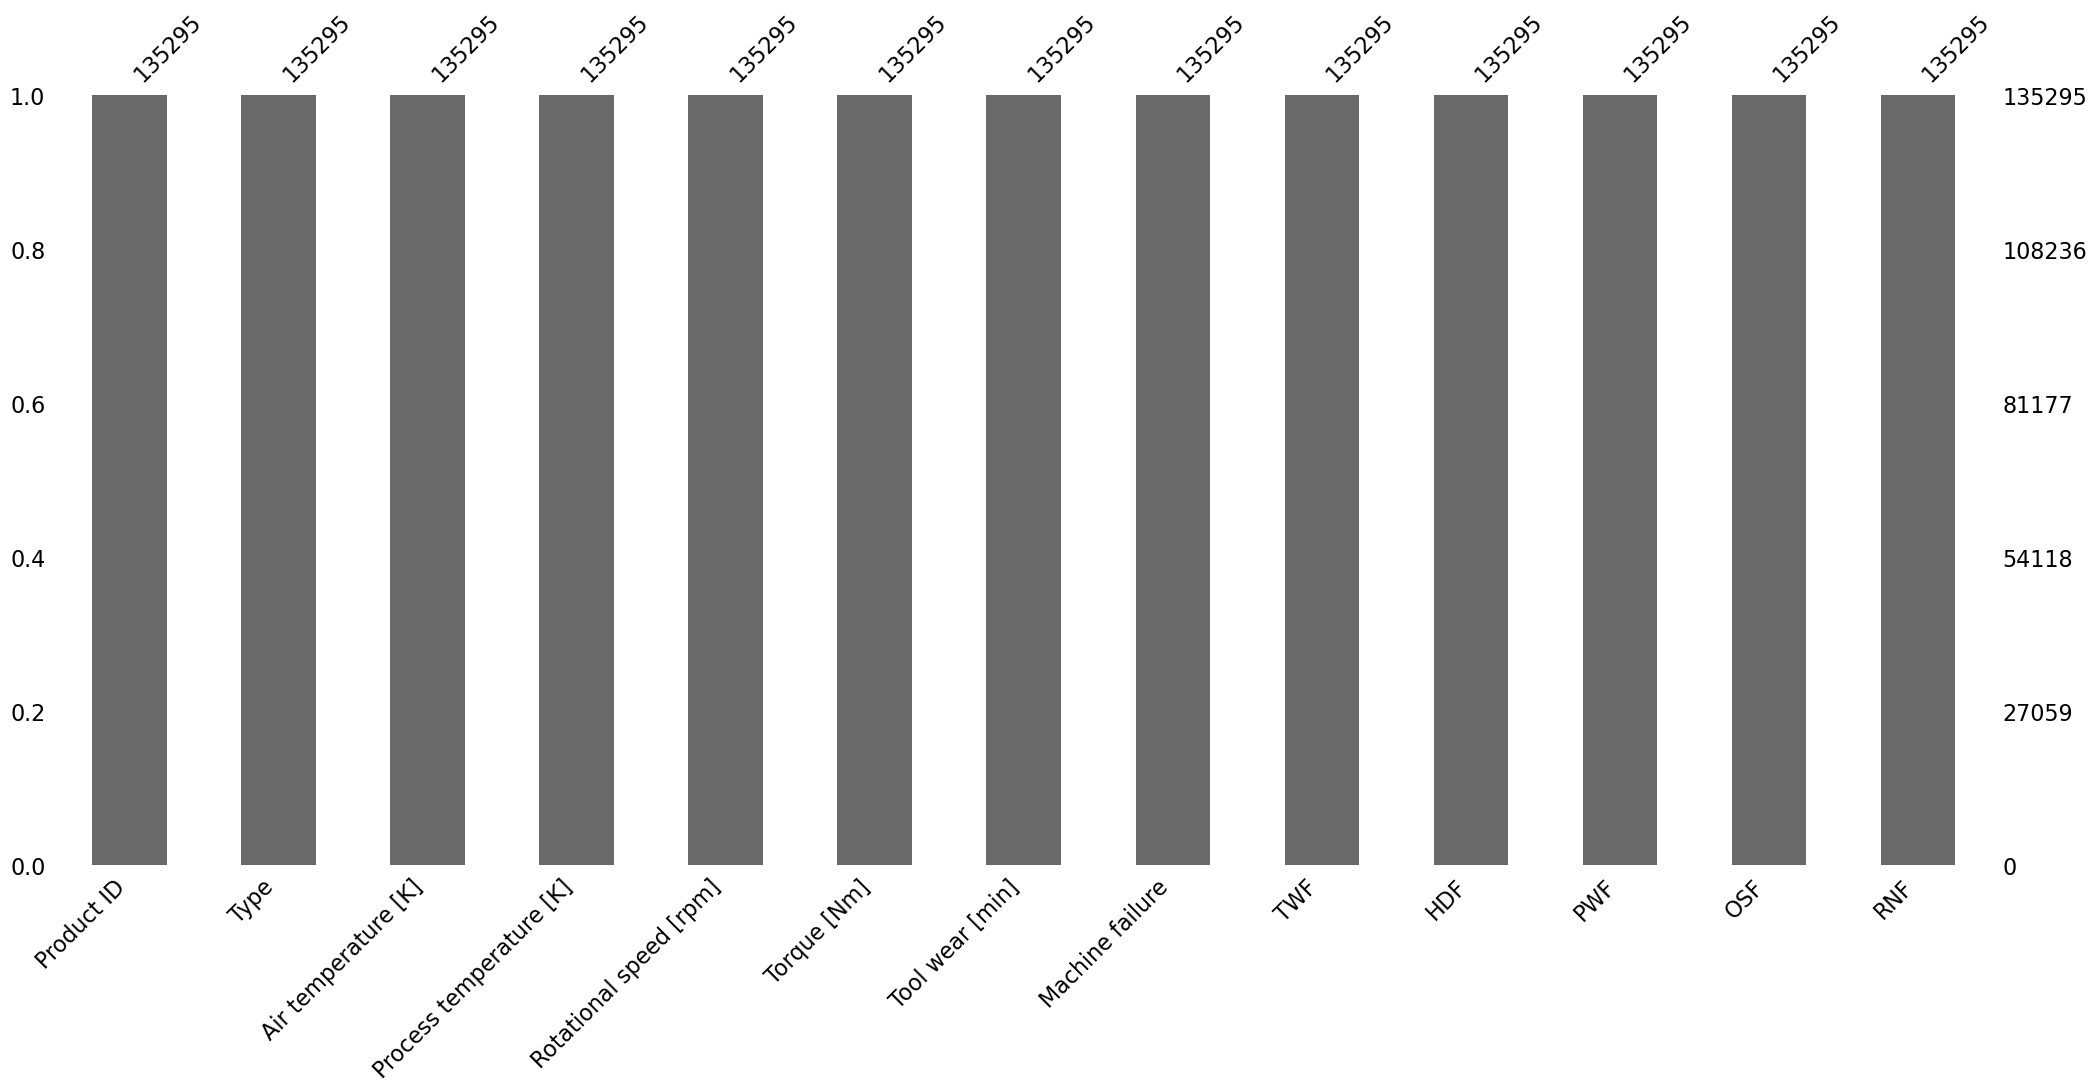

In [14]:
# Visualize the Null values in train data

msno.bar(df_train)
plt.show()

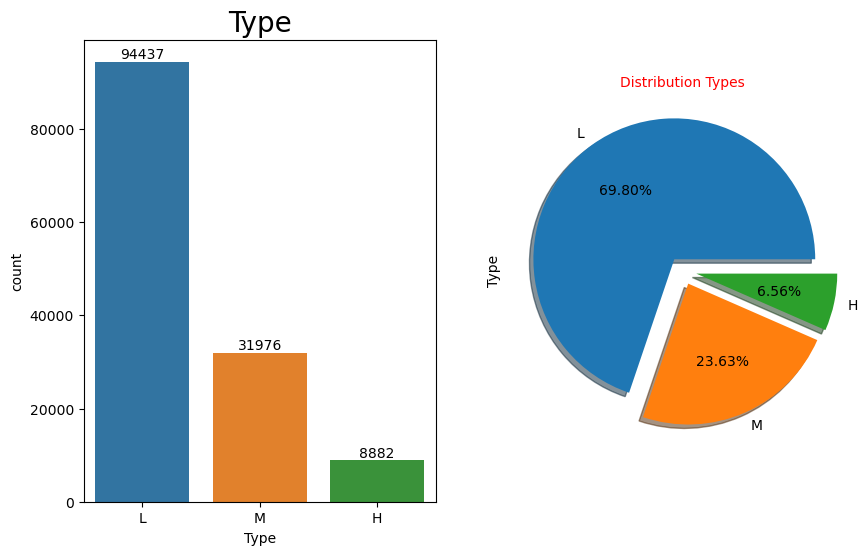

In [15]:
# plot the types in test data
plt.figure(figsize=(10,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df_train)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20)

ax =plt.subplot(1,2,2)
ax=df_train['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Distribution Types", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [16]:
# Check the count of machine failures for each type
failure_counts = df_train.loc[df_train['Machine failure'] == 1, 'Type'].value_counts()

# Display the counts for each type
for typ, count in failure_counts.items():
    print(f"{typ} -> Count of machine failures: {count}")

L -> Count of machine failures: 1579
M -> Count of machine failures: 434
H -> Count of machine failures: 116


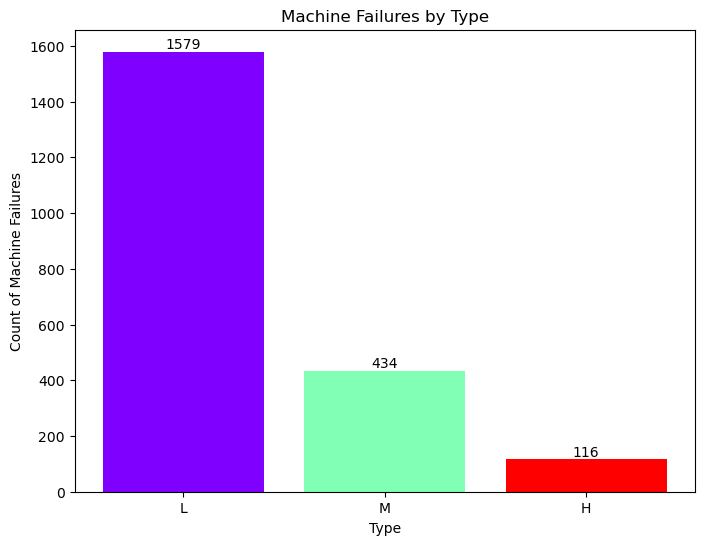

In [17]:
# Visualize the count of machine failures for each type
failure_counts = df_train.loc[df_train['Machine failure'] == 1, 'Type'].value_counts()

# Get the unique types and their counts
types = failure_counts.index
counts = failure_counts.values

# Create a colormap
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(types)))

# Plot the counts for each type
plt.figure(figsize=(8, 6))
bars = plt.bar(types, counts, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Type')
plt.ylabel('Count of Machine Failures')
plt.title('Machine Failures by Type')
plt.show()

In [18]:
#function to visualize the binary machine failures
def plot_binary_machine_failures(dataframe, column):
    # Plot the machine failures
    plt.figure(figsize=(10, 6))

    # Countplot for Machine failure
    ax = plt.subplot(1, 2, 1)
    ax = sns.countplot(x=column, data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.title(column + " Failure", fontsize=20)

    # Pie chart for Outcome
    ax = plt.subplot(1, 2, 2)
    outcome_counts = dataframe[column].value_counts()
    ax = outcome_counts.plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
    ax.set_title("Outcome", fontsize=20, color='Red', font='Lucida Calligraphy')

    # Display the plot
    plt.tight_layout()
    plt.show()

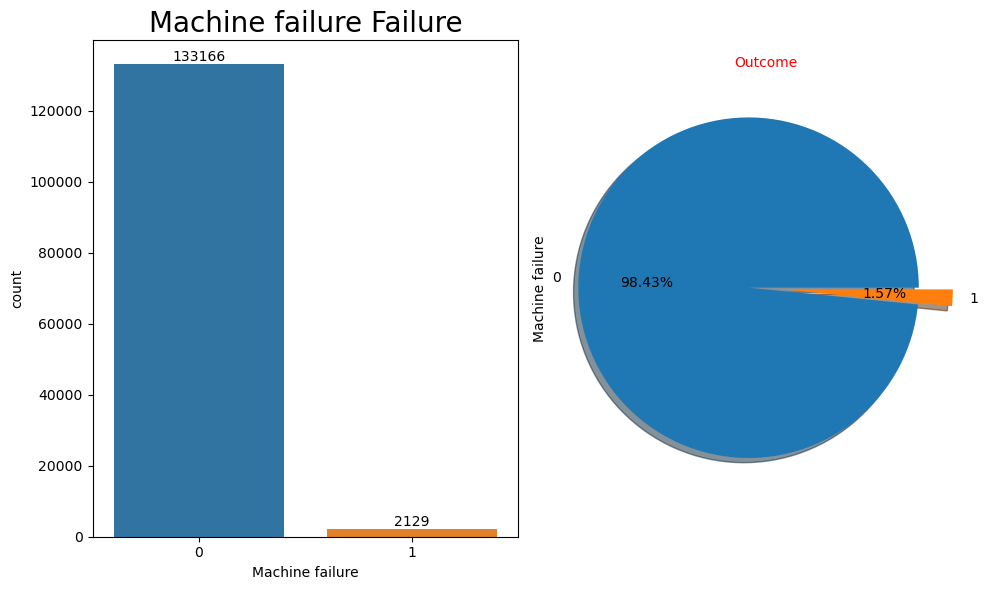

In [19]:
# Visualize the machine failure
plot_binary_machine_failures(df_train, 'Machine failure')

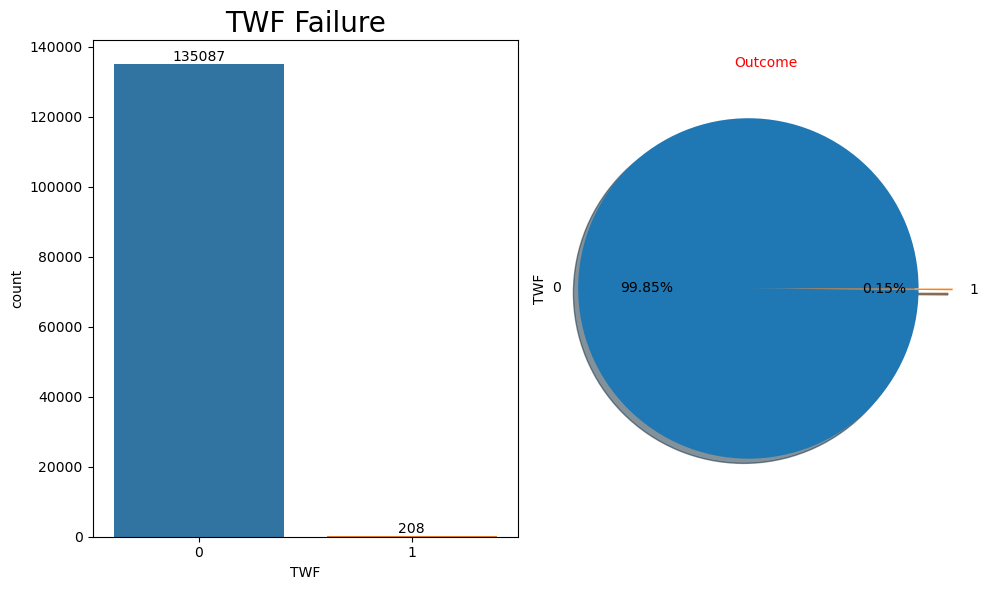

In [20]:
plot_binary_machine_failures(df_train, 'TWF')

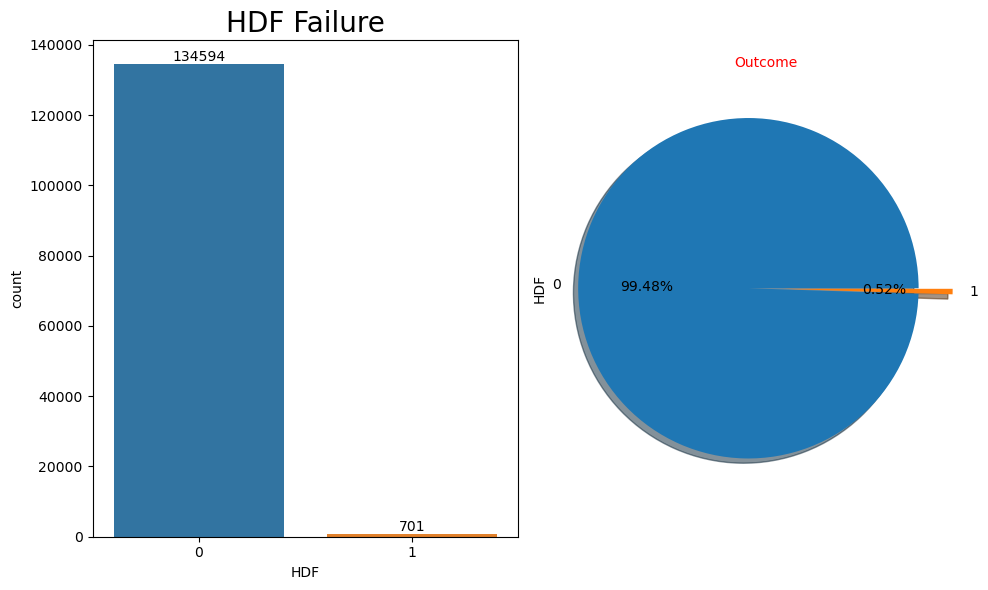

In [21]:
plot_binary_machine_failures(df_train, 'HDF')

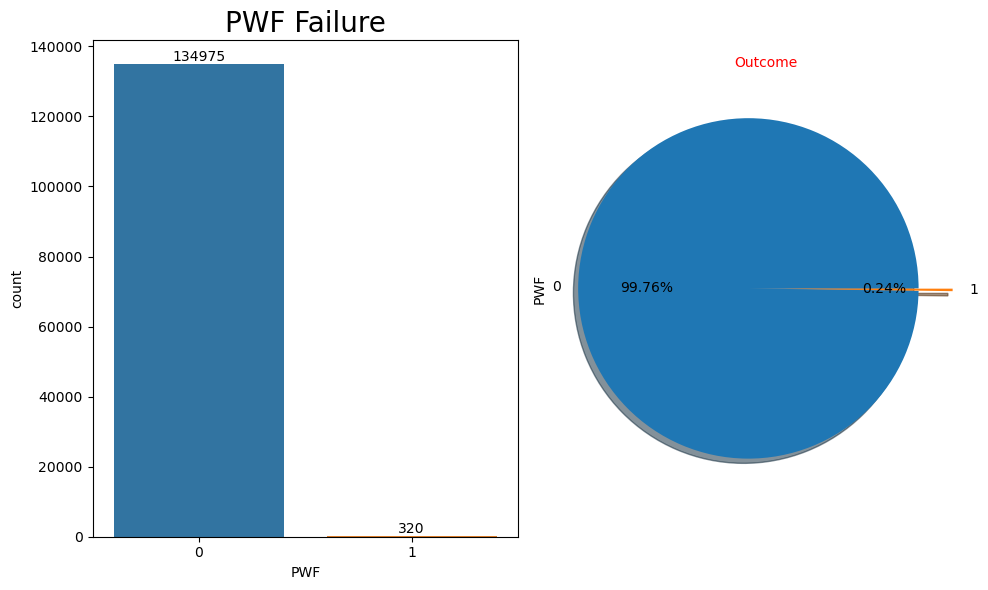

In [22]:
plot_binary_machine_failures(df_train, 'PWF')

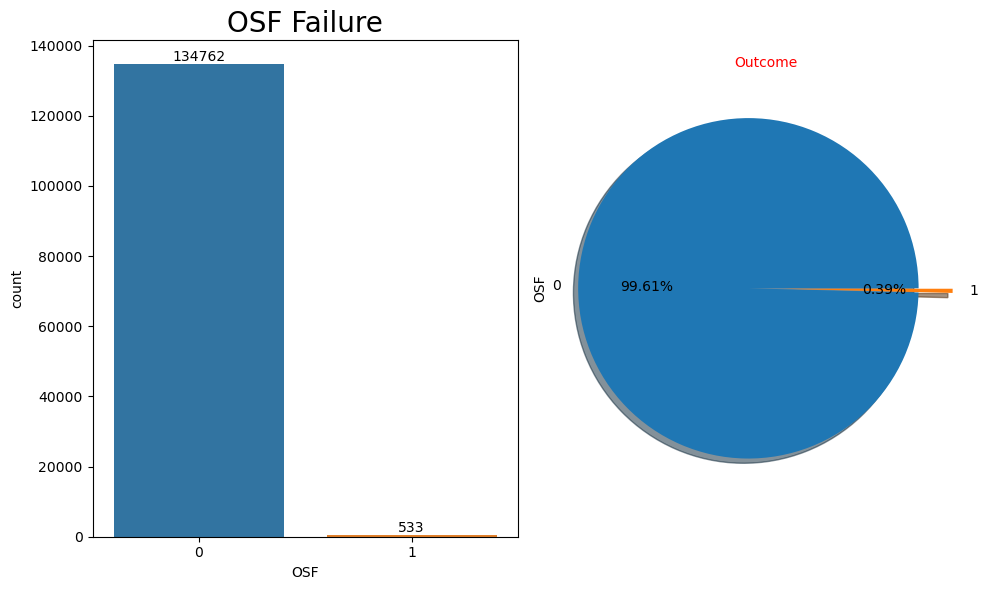

In [23]:
plot_binary_machine_failures(df_train, 'OSF')

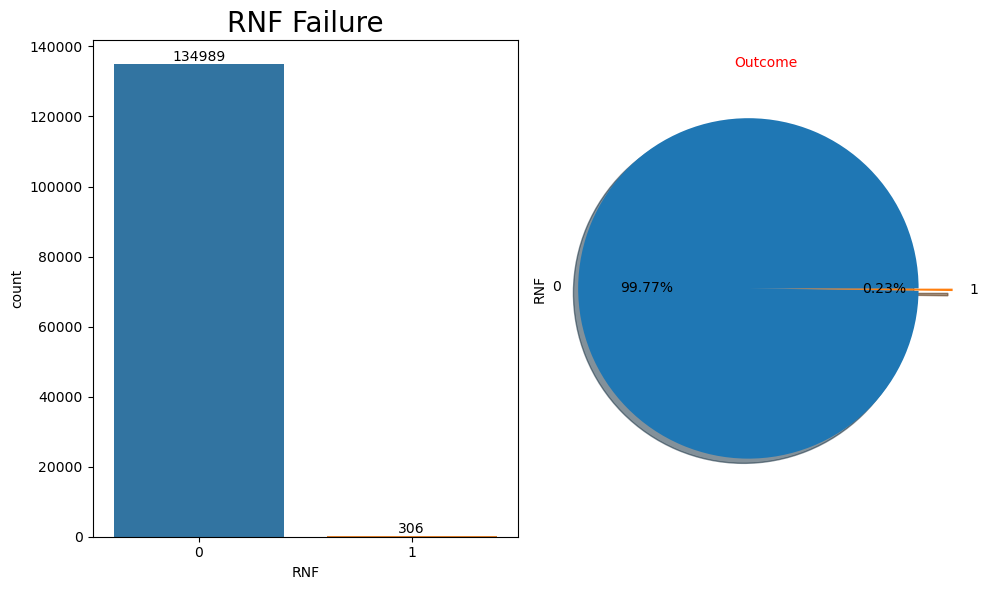

In [24]:
plot_binary_machine_failures(df_train, 'RNF')

In [25]:
# Select the binary columns
reason_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Filter the data for machine failures
failures_data = df_train[df_train['Machine failure'] == 1]

# Count the occurrences of each reason for machine failures
reason_counts = failures_data[reason_columns].sum()

# Display the reason counts
print(reason_counts)

TWF    208
HDF    696
PWF    317
OSF    530
RNF      6
dtype: int64


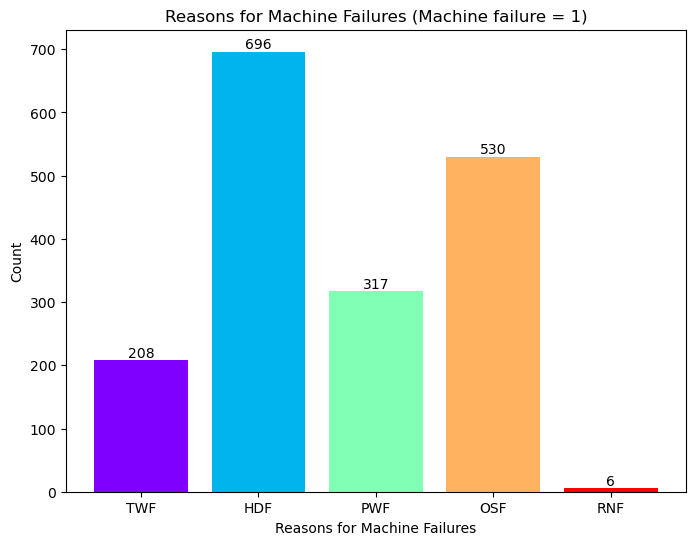

In [26]:
reason_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Filter the data for machine failures
failures_data = df_train[df_train['Machine failure'] == 1]

# Count the occurrences of each reason for machine failures
reason_counts = failures_data[reason_columns].sum()

# Create a colormap
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(reason_columns)))

# Plot the reason counts
plt.figure(figsize=(8, 6))
bars = plt.bar(reason_columns, reason_counts, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Reasons for Machine Failures')
plt.ylabel('Count')
plt.title('Reasons for Machine Failures (Machine failure = 1)')
plt.show()

In [27]:
# Separate the dataframe based on machine failures
failure_df = df_train[df_train['Machine failure'] == 1]

# Create separate dataframes for each type
type_dfs = {}
for typ in failure_df['Type'].unique():
    type_dfs[typ] = failure_df[failure_df['Type'] == typ]

# Access the separate dataframes for each type
for typ, type_df in type_dfs.items():
    globals()[f"type_{typ}_df"] = type_df

In [28]:
failure_df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135902,L52669,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0
135917,L56200,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0
135957,L55410,L,299.1,310.6,1353,49.7,74,1,0,0,0,0,0


In [29]:
# Filter the data for machine failures and any reason_columns value is 1
# Machine failures(MF) dataframe containing  atleast with 1 non zero values
reason_columns= ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
MF = failures_data[(failures_data[reason_columns] == 1).any(axis=1) & (failures_data['Machine failure'] == 1)]
MF

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
260,M18333,M,301.8,310.6,1378,48.3,62,1,0,1,0,0,0
385,L50678,L,301.9,311.1,1374,59.8,228,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135879,L51364,L,302.2,310.6,1337,56.8,159,1,0,1,0,1,0
135902,L52669,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0
135917,L56200,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0


In [30]:
# Function to visualize the numerical distributions
def plot_numerical_distributions(dataframe, columns_to_plot, num_rows, num_cols):
    # Create the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

    # Flatten the axes array
    axes = axes.flatten()

    # distribution plots for each feature with respect to 'Type'
    for i, column in enumerate(columns_to_plot):
        sns.histplot(data=dataframe, x=column, hue='Type', kde=True, multiple='stack', ax=axes[i])
        axes[i].set_title(f"Distribution Plot: {column}")
        axes[i].set_xlabel(column)
        axes[i].legend(title='Type', labels=['L', 'M', 'H'])

    # Remove any unused subplots
    if len(columns_to_plot) < num_rows * num_cols:
        for j in range(len(columns_to_plot), num_rows * num_cols):
            fig.delaxes(axes[j])

    # Adjust the spacing between subplots
    fig.suptitle("Distribution Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.10)
    fig.tight_layout()

    # Display the subplots
    plt.show()

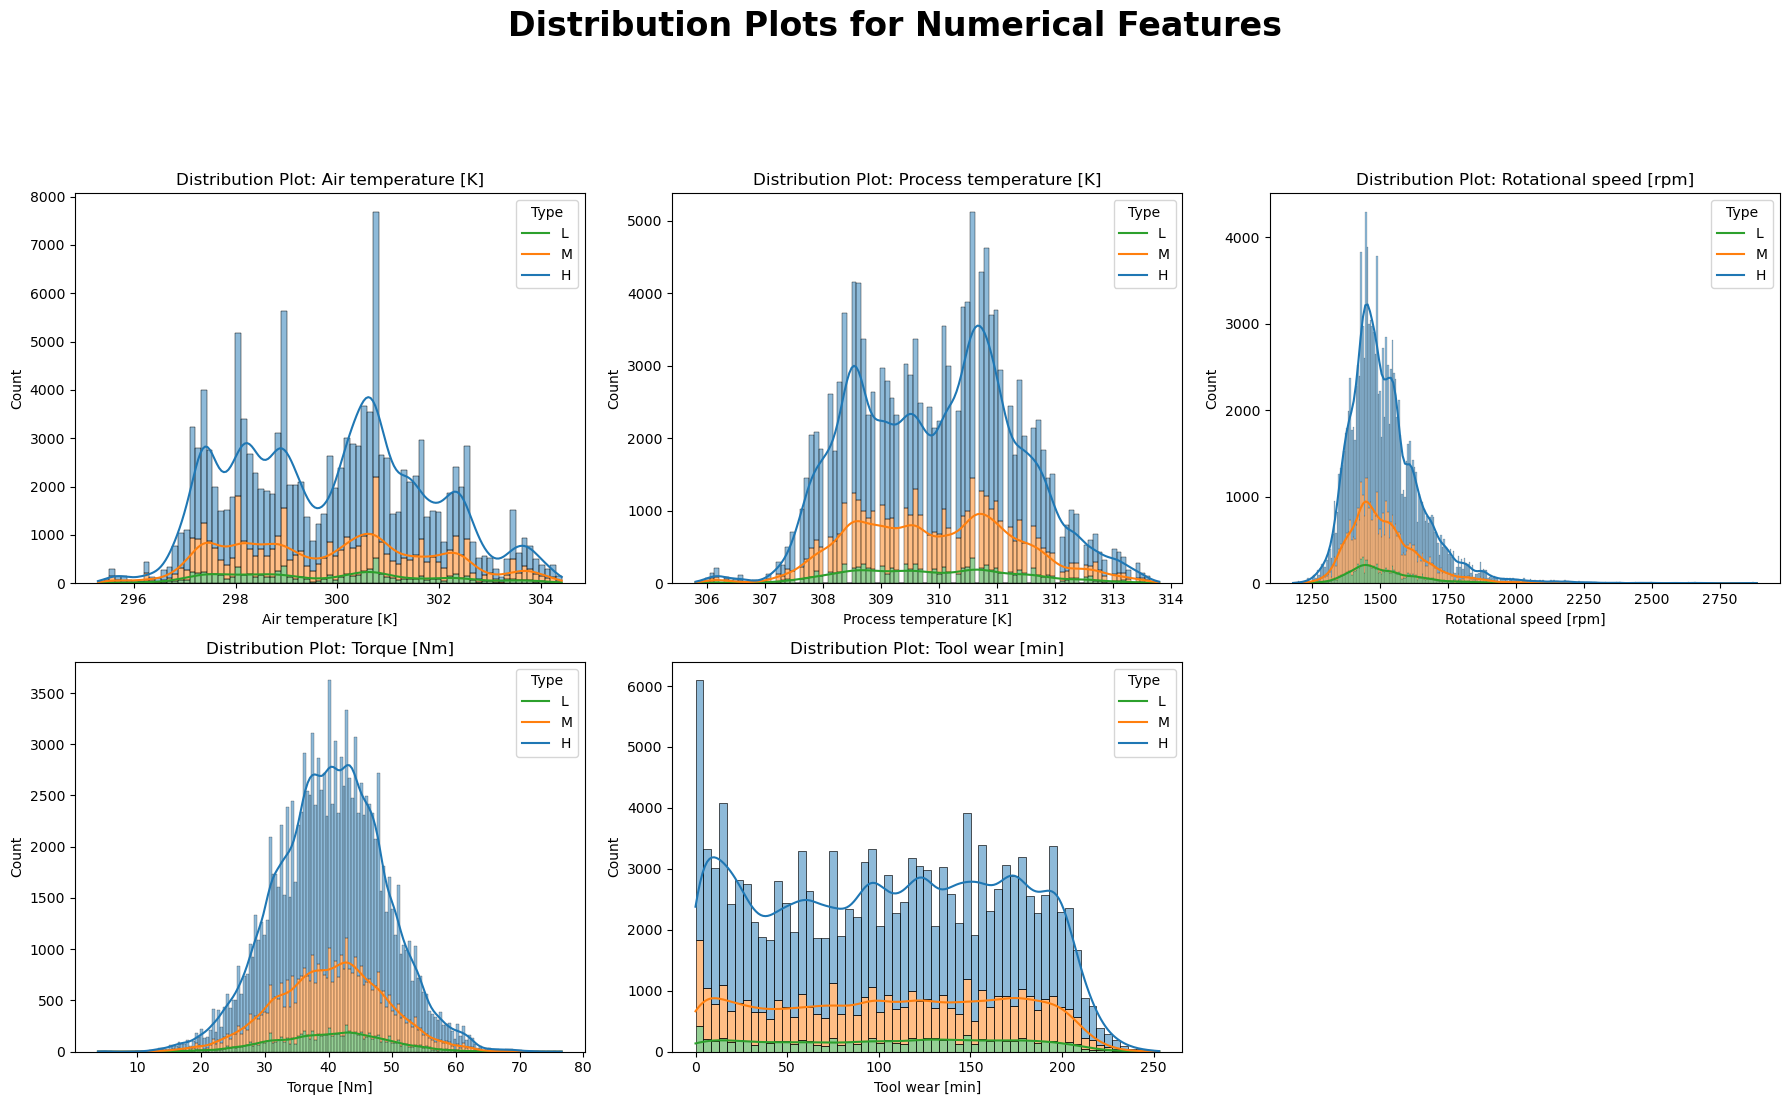

In [31]:
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
num_rows = 2
num_cols = 3

plot_numerical_distributions(df_train, columns_to_plot, num_rows, num_cols)

In [32]:
# Concat the train and orginal 
train = pd.concat([df_train, df_orginal],ignore_index=True)
train.drop(['Product ID'],inplace=True,axis=1)
train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145290,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
145291,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
145292,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
145293,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


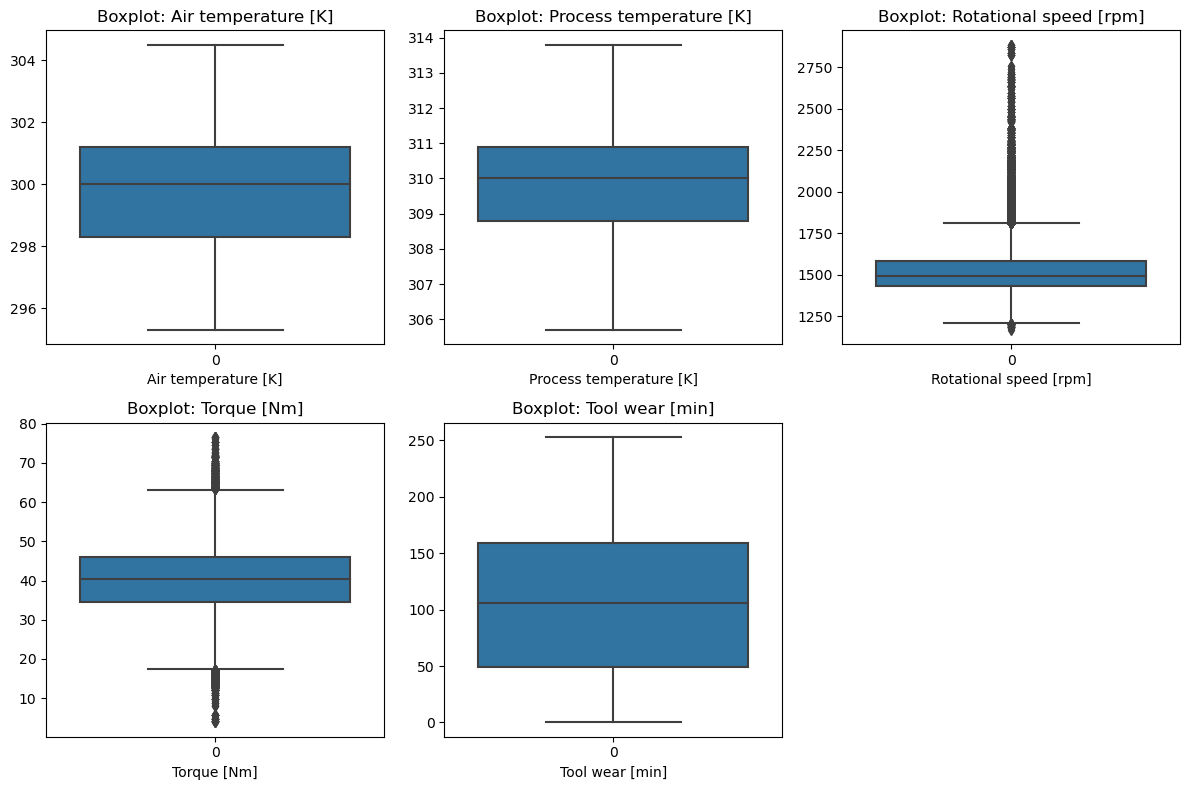

In [33]:
# Select the numerical columns to plot
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=train[column])
    plt.title(f'Boxplot: {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [34]:
type_mapping = {'L': 0, 'M': 1, 'H': 2}

 # Replace values in the 'Type' column for the train and test
train['Type']=train['Type'].replace(type_mapping)

df_test['Type']=df_test['Type'].replace(type_mapping)

In [35]:
train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145290,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
145291,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
145292,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
145293,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [36]:
# Create new features by comparing other ones
def New_Features(df):

    # Calculate 'TemperatureDifference' as the difference between 'Process temperature [K]' and 'Air temperature [K]'
    df['TemperatureDifference'] = df['Process temperature [K]'] - df['Air temperature [K]']
    
    # Calculate 'TemperatureRatio' as the ratio of 'Process temperature [K]' to 'Air temperature [K]'
    df['TemperatureRatio'] = df['Process temperature [K]'] / df['Air temperature [K]']
    
    # Calculate 'Power' as the product of 'Torque [Nm]' and 'Rotational speed [rpm]'
    df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
        
    # Calculate 'TotalFailures' as the sum of 'TWF', 'HDF', 'PWF', 'OSF', and 'RNF'
    df['TF'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
    
    return df

In [37]:
# Add the new features to the train and test data , call the function
train = New_Features(train)
df_test = New_Features(df_test)

In [38]:
# Define a function to remove special characters from column names

def remove_special_characters(column_name):
    # Remove non-alphanumeric characters
    pattern = r'[^A-Za-z0-9_]+'
    return re.sub(pattern, '', column_name)

# Rename columns of the train DataFrame
train = train.rename(columns=lambda x: remove_special_characters(x))

# Rename columns of the test DataFrame
df_test = df_test.rename(columns=lambda x: remove_special_characters(x))

In [39]:
def apply_robust_scaler(train_data, test_data, columns_to_scale):
    # Create a RobustScaler object
    scaler = RobustScaler()
    
    # Fit and transform the training data
    train_scaled = scaler.fit_transform(train_data[columns_to_scale])
    train_data[columns_to_scale] = train_scaled
    
    # Transform the test data
    test_scaled = scaler.transform(test_data[columns_to_scale])
    test_data[columns_to_scale] = test_scaled
    
    return train_data, test_data

In [40]:
train

,Type,AirtemperatureK,ProcesstemperatureK,Rotationalspeedrpm,TorqueNm,Toolwearmin,Machinefailure,TWF,HDF,PWF,OSF,RNF,TemperatureDifference,TemperatureRatio,Power,TF
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,9.0,1.029940,57615.6,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,9.5,1.031395,51186.9,0
2,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,9.2,1.030738,47832.5,0
3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,9.9,1.032890,67513.2,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,11.0,1.036913,58091.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145290,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,1.032129,47318.0,0
145291,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,1.031783,51897.6,0
145292,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,1.032107,54943.0,0
145293,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,1.032441,68288.0,0


In [41]:
# Specify the columns to scale
columns_to_scale = ['AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin','TWF','HDF','PWF','OSF','RNF','TemperatureDifference','TemperatureRatio','Power','TF']

# Call the function to apply RobustScaler
train_scaled, test_scaled = apply_robust_scaler(train, df_test, columns_to_scale)

[LightGBM] [Warning] bagging_fraction is set=0.34847746710838445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.34847746710838445
[LightGBM] [Warning] feature_fraction is set=0.3147999395726483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3147999395726483
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28554
           1       0.91      0.83      0.87       505

    accuracy                           1.00     29059
   macro avg       0.95      0.91      0.93     29059
weighted avg       1.00      1.00      1.00     29059

Confusion Matrix:
[[28512    42]
 [   87   418]]


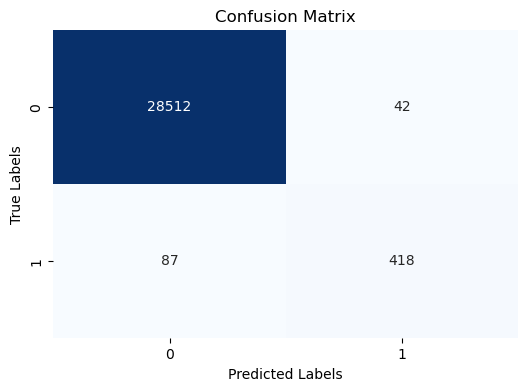

In [42]:
# Split the data into features (X) and target variable (y)
X = train.drop(columns=['Machinefailure'])
y = train['Machinefailure']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Set the best parameters obtained from Optuna
best_params = {
    'num_leaves': 42,
    'learning_rate': 0.09953504603121897,
    'feature_fraction': 0.3147999395726483,
    'bagging_fraction': 0.34847746710838445,
    'bagging_freq': 9,
    'min_child_samples': 15
}

# Build the model with the best parameters
model = lgbm.LGBMClassifier(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the probabilities for each class
y_prob = model.predict_proba(X_valid)[:, 1]

Area under ROC curve: 0.9729033472794644


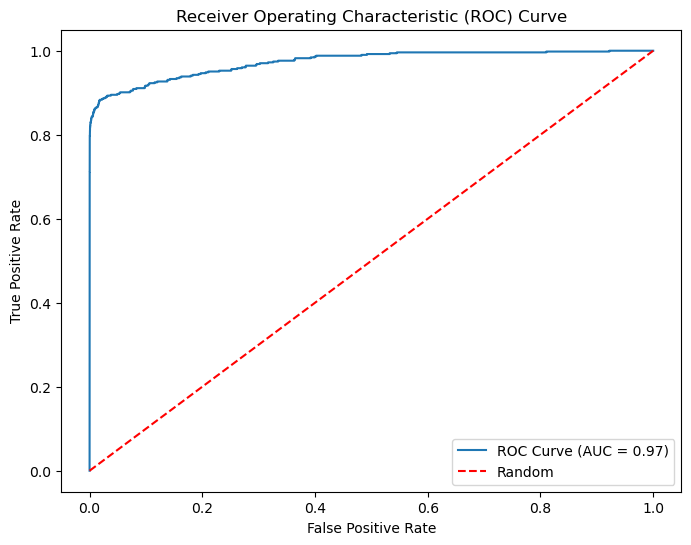

In [43]:
# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_valid, y_prob)
print("Area under ROC curve:", roc_auc)

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Create a dataframe of actual and predicted values
df_results = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
# Print the dataframe
df_results.T

,91942,19872,128441,91138,25441,11677,109717,92157,75317,22143,...,21725,103985,48946,5247,85590,5303,48019,121834,20906,32750
Actual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_test.drop(['ProductID'],inplace=True,axis=1)

In [46]:
# predict on the test data 
y_predict_lgbm = model.predict(df_test)

In [47]:
# Make a submission 
df_submission['Machine failure']=y_predict_lgbm
df_submission

,Machine failure
id,
136429,0
136430,0
136431,0
136432,0
136433,0
...,...
227378,0
227379,0
227380,0
